### 범주형 데이터 처리 
- 범주형 데이터는 일반적인 모델링 수학적 연산형 모델링이 많다.
이런 경우 범주형 데이터가 사용이 불가능하기 때문에 특별하게 처리
- 더미변수를 생성 
- 더미변수 -> 범주형 데이터들을 각각 컬럼으로 생성 -> 해당 범주에 속하는 지를 False(0)과 True(1)로 표현 

In [6]:
import pandas as pd
from sklearn.datasets import load_wine

In [7]:
wine_load = load_wine()

In [8]:
wine = pd.DataFrame(wine_load['data'], columns = wine_load['feature_names'])
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
wine['Class'] = wine_load['target']
wine['Class']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int32

In [10]:
## Class 컬럼의 데이터들을 변경
wine['Class'] = wine['Class'].map(
    {
        0 : 'class_0',
        1 : 'class_1',
        2 : 'class_2'
    }
)
wine['Class'].value_counts()

Class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [11]:
## Class 컬럼의 데이터들을 더미변수로 생성 
# get + dummies -> get_dummies()
wine_dummy = pd.get_dummies(wine, columns = ['Class'])

In [12]:
wine_dummy.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class_class_0,Class_class_1,Class_class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,True,False,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,True,False,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,True,False,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,True,False,False


In [13]:
wine_dummy['Class_class_0'].value_counts()

Class_class_0
False    119
True      59
Name: count, dtype: int64

#### 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위해 데이터를 train, test 세트로 나누고 독립변수와 종속변수로 분리하는 작업 
- 분석 방법에 따라 train, validation, test 세트로 나누기도 한다. 
- 적절한 비율
    - train : test = 7 : 3
    - train : validation : test = 6 : 2 : 2
- sklearn에 내장된 train_test_split() 함수를 이용하여 분할 
    - train_test_split(X, Y, test_size = None, random_state = None, shuffle = bool, stratify = None)
        - X : 독립 변수 데이터 
        - Y : 종속 변수 데이터 
        - test_size : 테스트 데이터의 비율 (0부터 1사이의 값)
        - random_state : 임의의 번호를 지정, 같은 숫자를 이용한다면 같은 값들이 출력 
        - shuffle : True면 추출 전에 데이터들을 섞는다. 
        - stratify : None이 아닌 경우에는 지정된 변수를 기준으로 계층화를 하여 해당 변수의 비율이 유지되도록 추출 

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [15]:
iris = pd.DataFrame(
    load_iris()['data'],
    columns = load_iris()['feature_names']
)
iris['Class'] = load_iris()['target']
iris['Class'] = iris['Class'].map(
    {
        0 : 'Setosa',
        1 : 'Versicolour',
        2 : 'Virginaca'
    }
)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
# 8:50
## 데이터를 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('Class', axis = 1),
    iris['Class'],
    test_size= 0.3,
    random_state= 100
)

In [17]:
# train, test 개수를 확인 
print('X_train의 개수 :' , X_train.shape, 'X_test의 개수 :', X_test.shape)
print('Y_train의 개수 :' , Y_train.shape, 'Y_test의 개수 :', Y_test.shape)

X_train의 개수 : (105, 4) X_test의 개수 : (45, 4)
Y_train의 개수 : (105,) Y_test의 개수 : (45,)


In [18]:
iris['Class'].value_counts()

Class
Setosa         50
Versicolour    50
Virginaca      50
Name: count, dtype: int64

In [19]:
Y_train.value_counts()

Class
Versicolour    39
Setosa         34
Virginaca      32
Name: count, dtype: int64

In [20]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    iris.drop('Class', axis = 1),
    iris['Class'],
    test_size= 0.3,
    random_state= 100,
    stratify = iris['Class']                                    # 개수를 정확히 분할  계층화. 계층화를 안해주면 전체 비율이 7:3으로 만들어져 편향이 생길 수 있다.
)

In [21]:
Y_train2.value_counts()

Class
Versicolour    35
Setosa         35
Virginaca      35
Name: count, dtype: int64

### 데이터 스케일링
- 알고리즘 분석의 대부분은 컬럼 간의 데이터의 범위가 크게 차이가 나는 경우에는 만족스러운 결과가 나오지 않는다. 
- 값의 범위가 작은 컬럼에 비해서, 값의 범위가 큰 컬럼이 타겟 변수를 예측하는데 영향을 많이 준다.
- 스케일링 작업은 모든 컬럼의 값의 범위를 같게 만들어주는 작업
- 데이터 스케일링 순서
    - 데이터 스케일링의 주의할 점은 train데이터와 test데이터를 같은 scaler 객체로 스케일링을 한다.

    1. Scaler 선택, 로드
    2. Scaler 객체 생성 (Class 생성)
    3. train 데이터의 분포를 저장
    4. train 데이터를 스케일링
    5. test 데이터를 스케일링 
    6. 원래의 스케일로 변환 

#### Standard Scaler
- 표준화 방식으로 기본 스케일링 방식으로 컬럼들을 평균이 0, 분산이 1인 정규분포로 스케일링
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 굉장히 민감. so, 이상치에 대한 확인 및 정제한 후 사용
- 회귀분석보다는 분류분석에서 유용

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
## Scaler 로드
from sklearn.preprocessing import StandardScaler 

# Scaler 객체 생성 (Class 생성)
StdScaler = StandardScaler()

In [24]:
## train 데이터의 분포 저장
StdScaler.fit(X_train2)

StandardScaler()

In [25]:
## train 데이터를 스케일링
X_train_sc = StdScaler.transform(X_train2)

In [26]:
X_test_sc = StdScaler.transform(X_test2)

In [27]:
print(round(X_train_sc.min(), 2))
print(round(X_train_sc.max(), 2))
print(round(X_train_sc.mean(), 2))
print(round(X_train_sc.std(), 2))

-2.14
2.75
-0.0
1.0


In [28]:
print(round(X_test_sc.min(), 2))
print(round(X_test_sc.max(), 2))
print(round(X_test_sc.mean(), 2))
print(round(X_test_sc.std(), 2))

-2.63
3.23
-0.08
1.03


#### Min-Max Scaler
- 정규화 방식으로 컬럼들을 0과 1사이의 값으로 스케일링하는 방식
- 최소값 : 0 , 최대값: 1 
- 이상치에 굉장히 민감함으로 이상치를 미리 확인 및 정제
- 분류 분석보다는 회귀 분석에서 주로 사용 

In [29]:
## Scaler를 로드
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체를 생성(Class생성)
MmScaler = MinMaxScaler()

In [30]:
## train 데이터를 fit
MmScaler.fit(X_train2)

MinMaxScaler()

In [31]:
## train 데이터를 스케일링
X_train_sc2 = MmScaler.transform(X_train2)

In [32]:
## test 데이터를 스케일링
X_test_sc2 = MmScaler.transform(X_test2)

In [33]:
print(round(X_train_sc2.min(), 2))
print(round(X_train_sc2.max(), 2))
print(round(X_train_sc2.mean(), 2))
print(round(X_train_sc2.std(), 2))

0.0
1.0
0.45
0.27


In [34]:
print(round(X_test_sc2.min(), 2))
print(round(X_test_sc2.max(), 2))
print(round(X_test_sc2.mean(), 2))
print(round(X_test_sc2.std(), 2))

-0.1
1.1
0.43
0.27


#### Max Abs Scaler
- 최대절대값과 0을 기준으로 1과 0이 되도록 모든 값이 -1에서 1까지로 표현  
- 스케일링 데이터들이 양수라면 Min-Max와 동일
- 이상치에 대해 굉장히 민감함으로 이상치를 확인 및 정제
- 분류보다는 회귀에서 유용

In [35]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

MaScaler.fit(X_train2)

X_train_sc3 = MaScaler.transform(X_train2)


X_test_sc3 = MaScaler.transform(X_test2)
print(round(X_train_sc3.min(), 2))
print(round(X_train_sc3.max(), 2))
print(round(X_train_sc3.mean(), 2))
print(round(X_train_sc3.std(), 2))

0.04
1.0
0.63
0.24


In [36]:
print(round(X_test_sc3.min(), 2))
print(round(X_test_sc3.max(), 2))
print(round(X_test_sc3.mean(), 2))
print(round(X_test_sc3.std(), 2))

0.08
1.05
0.61
0.24


#### Robust Scaler
- 평균과 분산 대신에 중앙값과 사분위 값을 활용하는 방식
- 중앙값을 0으로 설정하고 IQR를 사용하여 이상치의 영향을 최소화하는 스케일링 방식
- quantile_range 매개변수(기본값이 [0.25, 0.75])를 조정하여 더 넓거나 좁은 범위의 값을 이상치로 설정하여 정제할 수 있다.


In [37]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

RuScaler.fit(X_train2)

X_train_sc4 = RuScaler.transform(X_train2)
X_test_sc4 = RuScaler.transform(X_test2)
print(round(X_train_sc4.min(), 2))
print(round(X_train_sc4.max(), 2))
print(round(X_train_sc4.mean(), 2))
print(round(X_train_sc4.std(), 2))

-1.33
2.0
-0.03
0.6


In [38]:
import numpy as np

In [39]:
np.percentile(X_train_sc4, 50)

0.0

#### 원본의 스케일로 변경 
- 스케일링을 한 데이터를 원본의 데이터로 변경 

In [40]:
pd.DataFrame(X_train_sc4).head()

,0,1,2,3
0,0.230769,-0.333333,-0.111111,-0.066667
1,-0.230769,-0.666667,0.000000,-0.133333
2,-0.615385,1.000000,-0.833333,-0.800000
3,-0.538462,0.833333,-0.833333,-0.733333
4,-0.076923,1.333333,-0.750000,-0.733333


In [41]:
X_origin = RuScaler.inverse_transform(X_train_sc4)

In [42]:
pd.DataFrame(X_origin).head()

,0,1,2,3
0,6.1,2.8,4.0,1.3
1,5.5,2.6,4.4,1.2
2,5.0,3.6,1.4,0.2
3,5.1,3.5,1.4,0.3
4,5.7,3.8,1.7,0.3


### 데이터의 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확하게 분류하는 것이 중요
- 일반적으로 이상 데이터가 target 값이 되는 경우가 많다. 
- 데이터가 불균형할 때 분류의 성능과 target 데이터를 정확히 분류해내는 목표가 일치하지 않게 되는 현상이 발생 (성능이 떨어진다.)
- 분석 결과, 머신러닝 등 모델링에서 문제가 발생
- 소수의 데이터인 target의 중요도를 낮게 판단함으로 궁극적으로 분석 가능한 모델이 생성되지 않는다. 
- 소수의 비정상 데이터를 늘리는 오버샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더샘플링이 존재

#### 언더샘플링
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터셋이 가진 라벨의 수 수준으로 감소시키는 방법 
- 데이터의 불균형 문제를 해결은 가능하지만, 데이터의 개수가 줄어듬으로 학습에 대한 성능이 떨어질 수 있다.

In [43]:
# !pip install imbalanced-learn

In [44]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [45]:
## 분포가 불균형한 데이터를 생성( 95:1 )
x, y = make_classification(n_samples = 5000, n_features = 5, weights = [0.95])
print(Counter(y))
print(x)

Counter({0: 4717, 1: 283})
[[ 0.19381963  0.96138042  2.58323152 -0.24073571  0.58546432]
 [ 0.44661096 -0.7486592  -1.49247457  1.68916552 -0.96218463]
 [ 1.41206948 -0.21085297  0.69724259  0.37830983 -1.36078319]
 ...
 [ 0.68436702 -0.52264827 -0.71819824 -0.36486613 -0.98737974]
 [ 0.22244478 -0.40931076 -0.83485211  1.41300709 -0.5076411 ]
 [-0.06882093  0.70237169  1.70444926  1.93875003  0.60601117]]


- 랜덤언더샘플링은 다수를 차지하는 라벨에서 무작위로 데이터를 제거하는 방법
- sampling_stratery 매개변수에 값을 majority로 지정하면 다수의 라벨의 데이터를 샘플링해서 소수의 라벨 데이터의 수와 같게 만든다. 
- 0과 1 사이의 값으로 지정하며 소수 라벨의 데이터 수와 다수 라벨의 데이터 수가 해당하는 비율에 맞게 조정

In [46]:
undersample = RandomUnderSampler(sampling_strategy= 'majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 283, 1: 283})


In [47]:
undersample2 = RandomUnderSampler(sampling_strategy= 0.5)
x_under2, y_under2 = undersample2.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 566, 1: 283})


#### 오버샘플링
- 소수의 라벨을 지닌 데이터셋을 다수 라벨을 지닌 데이터셋의 수만큼 증식시켜서 학습에 사용하기 위한 충분한 양과 데이터를 확보하는 방법
- 데이터의 손실이 없어서 일반적으로 언더샘플링보다 성능이 유리하여 주로 사용
- 과한 오버샘플링은 좋지 않다.

#### 랜덤오버샘플링
- 소수의 라벨을 지닌 데이터셋을 단순 복제하여 다수의 라벨과 비율을 맞추는 방법 
- 데이터를 단순하게 복제하기 때문에 분포는 변하지 않지만, 그 수가 증가함으로 같은 비율로 가중치를 받을 수 있다.
- 오버피팅 위험성이 다분하지만, 불균형 문제를 처리하지 않는 것보다는 유효 (데이터 불균형 문제가 더욱 크다.)

In [50]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy= 0.5)                # 데이터의 개수를 똑같은 양만큼 늘리겠다. 같게 만들어주겠다.

x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 4717, 1: 2358})


In [51]:
oversample2 = RandomOverSampler(sampling_strategy='minority')           # over에서는 minority, under에서는 majority
x_over2, y_over2 = oversample2.fit_resample(x, y)

print(Counter(y_over2))

Counter({0: 4717, 1: 4717})


#### SMOTE 
- 소수 라벨을 지닌 데이터셋의 관측값에 대한 k개의 최근접 이웃을 찾고 관측값과 이웃으로 선택된 값 사이에 임의의 데이터를 생성하는 방법

In [52]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy= 'minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 4717, 1: 4717})


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0.5, 1.0, 'SMOTE')

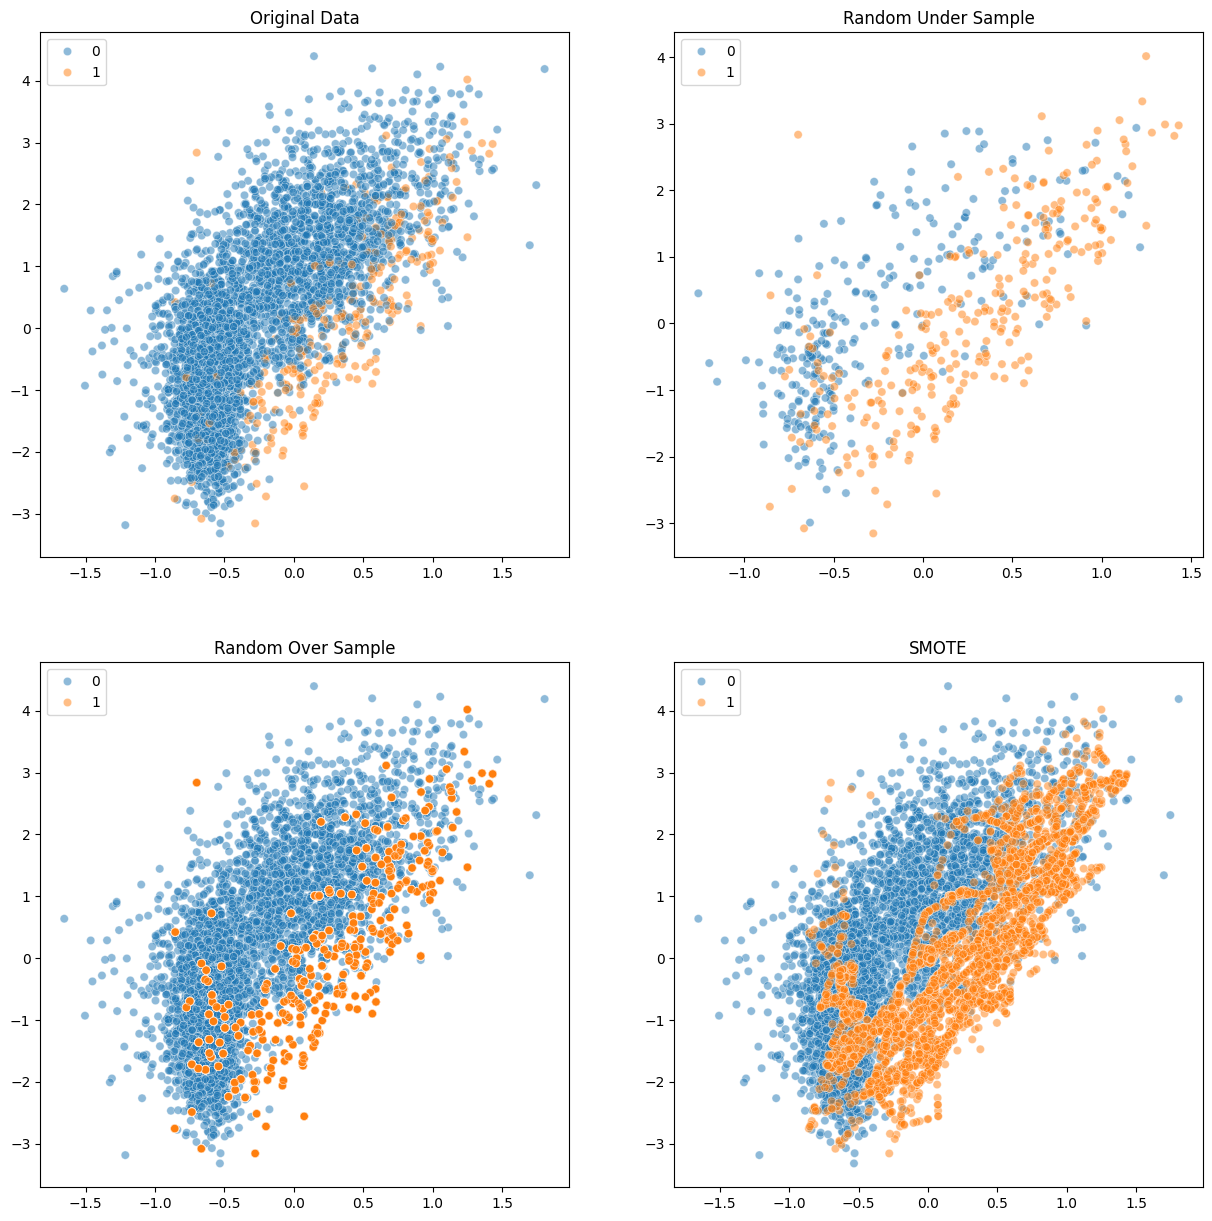

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))

sns.scatterplot(x = x[:, 1], y = x[:, 2], hue =y, ax = axes[0][0], alpha = 0.5)    
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue =y_under, ax = axes[0][1], alpha = 0.5)
sns.scatterplot(x = x_over2[:, 1], y = x_over2[:, 2], hue =y_over2, ax = axes[1][0], alpha = 0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue =y_sm, ax = axes[1][1], alpha = 0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sample')
axes[1][0].set_title('Random Over Sample')
axes[1][1].set_title('SMOTE')